In [1]:
!pip install lightkurve
%matplotlib inline


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

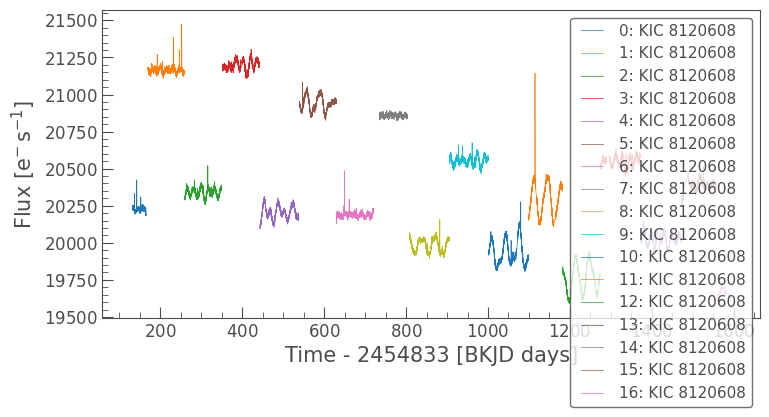

In [10]:
search_result = lk.search_lightcurve('Kepler-186', author = 'Kepler', cadence = 'long') # https://www.researchgate.net/publication/375716758_Analyzing_light_curves_to_highlight_phenomena_and_trends_in_planetary_systems_that_house_terrestrial_exoplanets -> Kepler-186f
lc_collection = search_result.download_all()
lc_collection.plot()

In [11]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr008120608,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr008120608,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr008120608,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr008120608,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr008120608,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr008120608,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr008120608,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr008120608,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr008120608,0.0


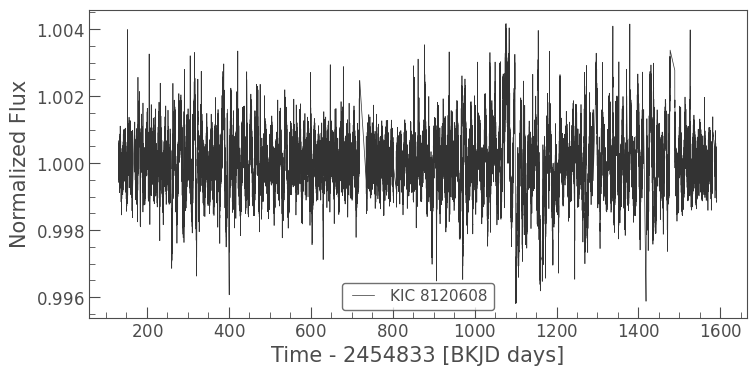

In [14]:
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

In [6]:
import numpy as np

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

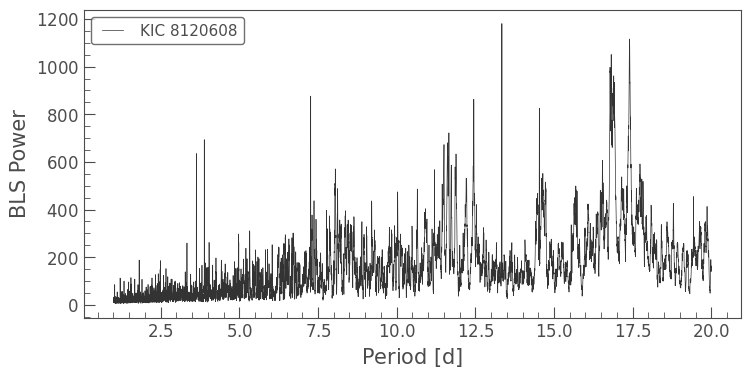

In [13]:
period = np.linspace(1, 20, 10000)
bls = lc.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls.plot()

In [15]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 13.34363436 d>

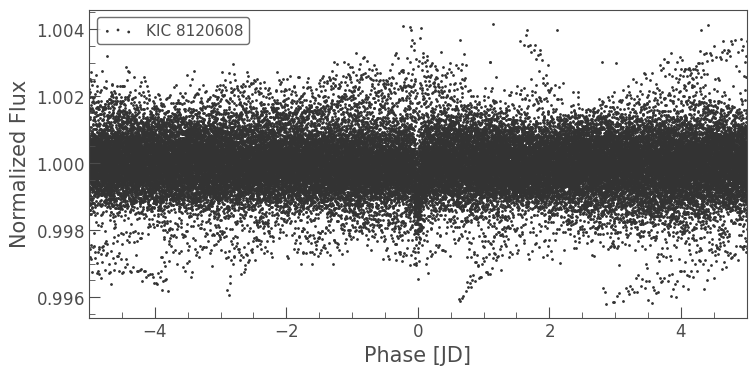

In [16]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5);

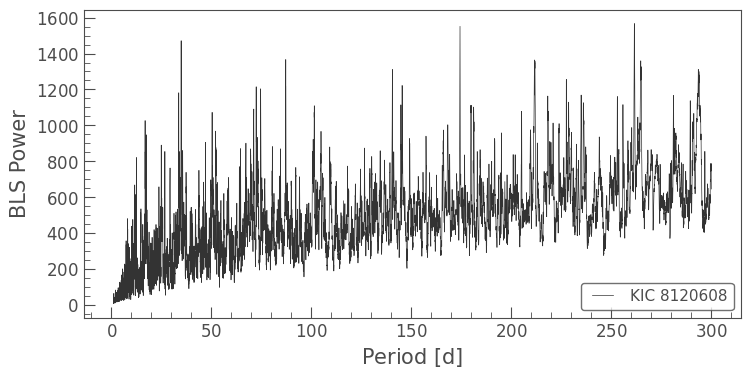

In [18]:
period = np.linspace(1, 300, 10000)
bls = lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot();

In [19]:
planet_c_period = bls.period_at_max_power
planet_c_t0 = bls.transit_time_at_max_power
planet_c_dur = bls.duration_at_max_power

# Check the value for period
planet_c_period

<Quantity 261.51485149 d>

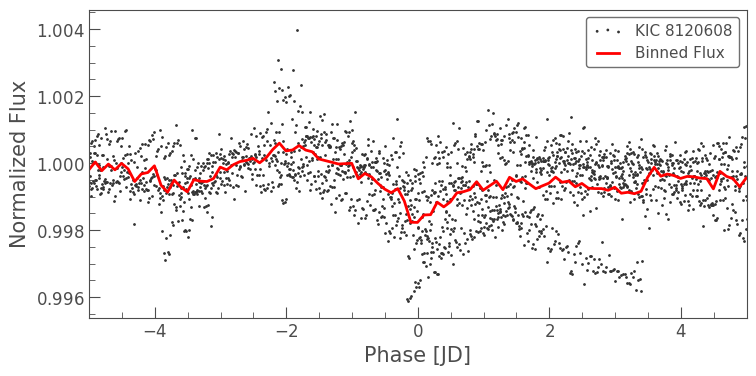

In [22]:
ax = lc.fold(planet_c_period, planet_c_t0).scatter()
lc.fold(planet_c_period, planet_c_t0).bin(.1).plot(ax=ax, c='r', lw=2,
                                                          label='Binned Flux')
ax.set_xlim(-5, 5);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8de697b-ba49-4014-b2b2-fe5f4cc3c026' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>